Problem 1 for the Data Set : Shoesales.csv 
You are an analyst in the IJK shoe company and you are expected to forecast the sales of the pairs of shoes for the upcoming 12 months from where the data ends. The data for the pair of shoe sales have been given to you from January 1980 to July 1995.
Problem 2 for the Data Set SoftDrink.csv :
You are an analyst in the RST soft drink company and you are expected to forecast the sales of the production of the soft drink for the upcoming 12 months from where the data ends. The data for the production of soft drink has been given to you from January 1980 to July 1995.
Please do perform the following questions on each of these two data sets separately.
1.	Read the data as an appropriate Time Series data and plot the data.
2.	Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.
3.	Split the data into training and test. The test data should start in 1991.
4.	Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data.
Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.
5.	Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
Note: Stationarity should be checked at alpha = 0.05.
6.	Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.
7.	Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.
8.	Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.
9.	Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.
10.	Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import statsmodels

## 1.	Read the data as an appropriate Time Series data and plot the data.

In [3]:
df=pd.read_csv('SoftDrink.csv')

In [4]:
df.head(5)

,YearMonth,SoftDrinkProduction
0,1980-01,1954
1,1980-02,2302
2,1980-03,3054
3,1980-04,2414
4,1980-05,2226


In [5]:
df.tail(5)

,YearMonth,SoftDrinkProduction
182,1995-03,4067
183,1995-04,4022
184,1995-05,3937
185,1995-06,4365
186,1995-07,4290


In [6]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [7]:
df['Time_Stamp'] = date
df.head()

,YearMonth,SoftDrinkProduction,Time_Stamp
0,1980-01,1954,1980-01-31
1,1980-02,2302,1980-02-29
2,1980-03,3054,1980-03-31
3,1980-04,2414,1980-04-30
4,1980-05,2226,1980-05-31


In [8]:
df.set_index(keys='Time_Stamp',drop=True,inplace=True)
df.head()

,YearMonth,SoftDrinkProduction
Time_Stamp,,
1980-01-31,1980-01,1954
1980-02-29,1980-02,2302
1980-03-31,1980-03,3054
1980-04-30,1980-04,2414
1980-05-31,1980-05,2226


In [9]:
df.drop(labels=['YearMonth'],axis=1,inplace=True)
df.head()

,SoftDrinkProduction
Time_Stamp,
1980-01-31,1954
1980-02-29,2302
1980-03-31,3054
1980-04-30,2414
1980-05-31,2226


In [10]:
from pylab import rcParams

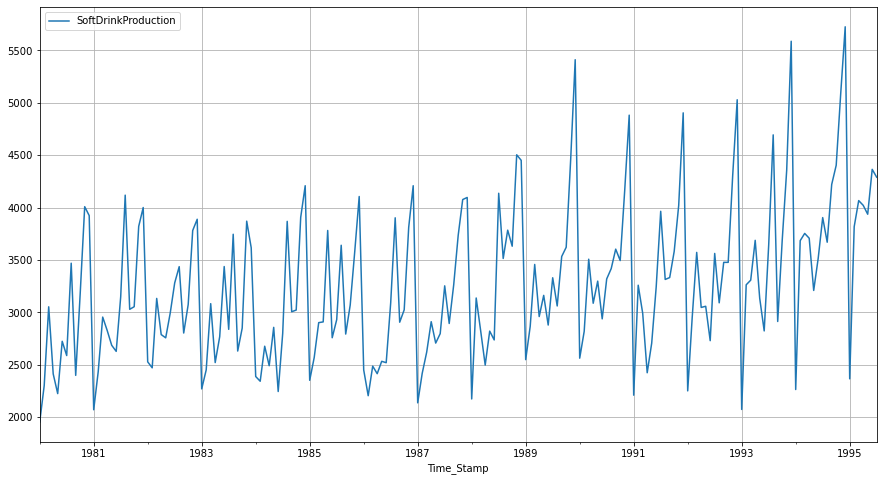

In [11]:
rcParams['figure.figsize'] = 15,8

df.plot()
plt.grid();

## 2.	Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [12]:
df.describe()

,SoftDrinkProduction
count,187.000000
mean,3262.609626
std,728.357367
min,1954.000000
25%,2748.000000
50%,3134.000000
75%,3741.000000
max,5725.000000


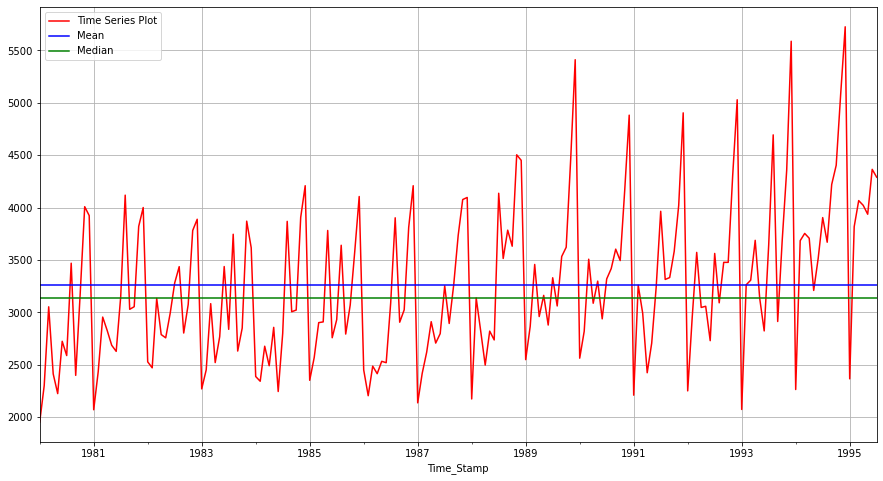

In [13]:
df.plot(color='Red')
plt.axhline(df['SoftDrinkProduction'].mean(),color='Blue')
plt.axhline(df['SoftDrinkProduction'].median(),color='Green')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median']);

C:\Users\shpar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


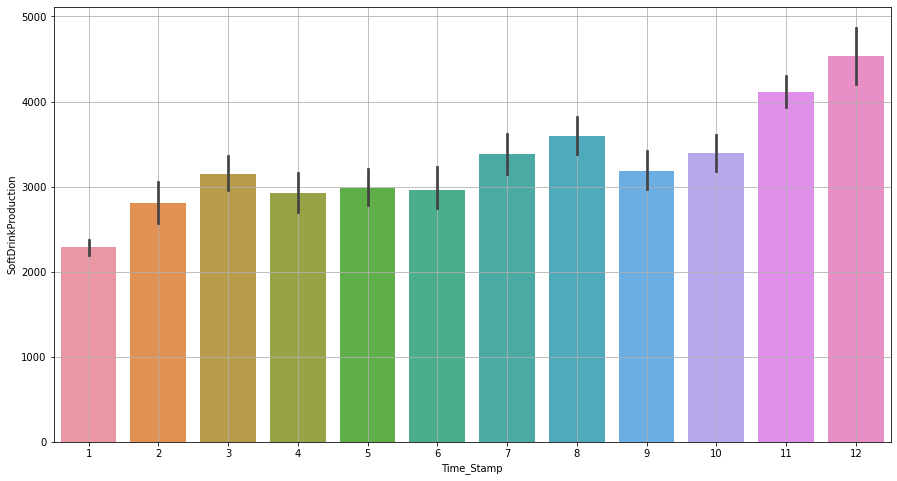

In [14]:
sns.barplot(df.index.month,df.SoftDrinkProduction,data=df)
plt.grid();

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

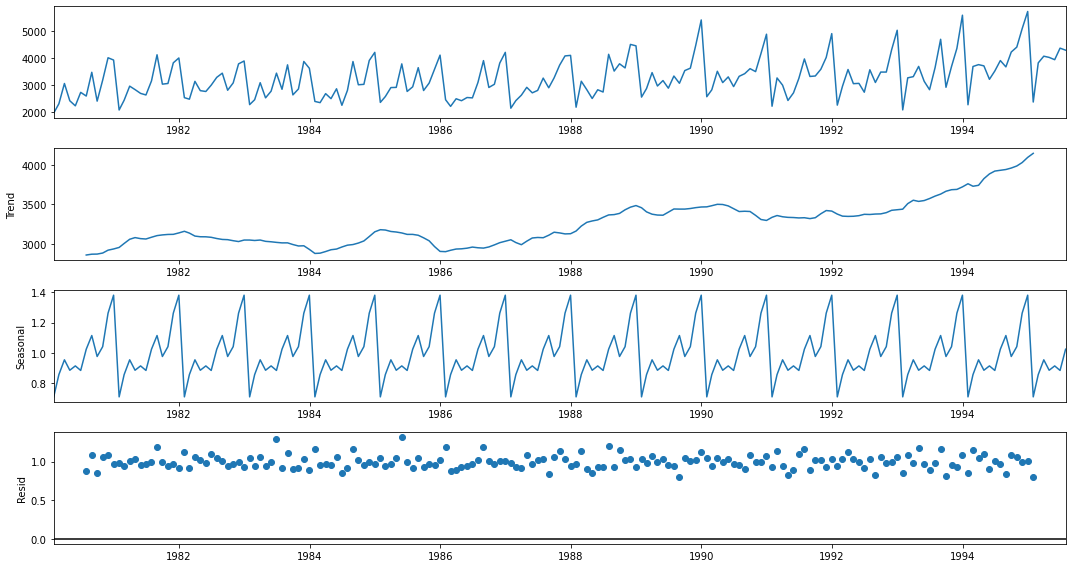

In [17]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

In [18]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [19]:
print('Trend','\n',trend,'\n')
print('Seasonality','\n',seasonality,'\n')
print('Residual','\n',residual,'\n')

Trend 
 Time_Stamp
1980-01-31   NaN
1980-02-29   NaN
1980-03-31   NaN
1980-04-30   NaN
1980-05-31   NaN
              ..
1995-03-31   NaN
1995-04-30   NaN
1995-05-31   NaN
1995-06-30   NaN
1995-07-31   NaN
Name: trend, Length: 187, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.709526
1980-02-29    0.856420
1980-03-31    0.953935
1980-04-30    0.885217
1980-05-31    0.913735
                ...   
1995-03-31    0.953935
1995-04-30    0.885217
1995-05-31    0.913735
1995-06-30    0.883890
1995-07-31    1.023936
Name: seasonal, Length: 187, dtype: float64 

Residual 
 Time_Stamp
1980-01-31   NaN
1980-02-29   NaN
1980-03-31   NaN
1980-04-30   NaN
1980-05-31   NaN
              ..
1995-03-31   NaN
1995-04-30   NaN
1995-05-31   NaN
1995-06-30   NaN
1995-07-31   NaN
Name: resid, Length: 187, dtype: float64 



## 3.	Split the data into training and test. The test data should start in 1991.

In [20]:
train    =   df[0:int(len(df)*0.71)] 
test     =   df[int(len(df)*0.71):]

In [21]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [22]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
             SoftDrinkProduction
Time_Stamp                     
1980-01-31                 1954
1980-02-29                 2302
1980-03-31                 3054
1980-04-30                 2414
1980-05-31                 2226 

Last few rows of Training Data 
             SoftDrinkProduction
Time_Stamp                     
1990-08-31                 3418
1990-09-30                 3604
1990-10-31                 3495
1990-11-30                 4163
1990-12-31                 4882 

First few rows of Test Data 
             SoftDrinkProduction
Time_Stamp                     
1991-01-31                 2211
1991-02-28                 3260
1991-03-31                 2992
1991-04-30                 2425
1991-05-31                 2707 

Last few rows of Test Data 
             SoftDrinkProduction
Time_Stamp                     
1995-03-31                 4067
1995-04-30                 4022
1995-05-31                 3937
1995-06-30                 4365
1995

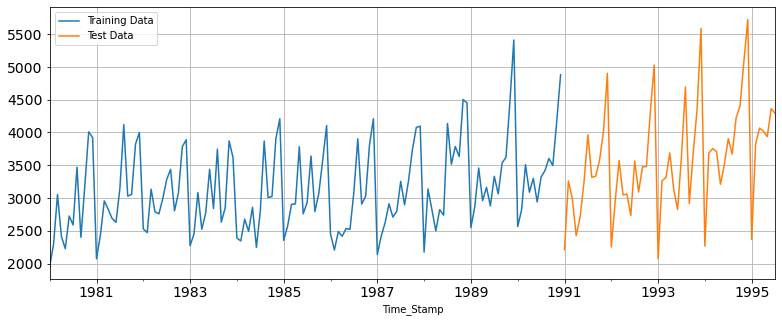

In [23]:
train['SoftDrinkProduction'].plot(figsize=(13,5), fontsize=14)
test['SoftDrinkProduction'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## 4.	Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data.
Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.

In [24]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


## Model 1 Linear Regression

In [25]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [26]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             SoftDrinkProduction  time
Time_Stamp                           
1980-01-31                 1954     1
1980-02-29                 2302     2
1980-03-31                 3054     3
1980-04-30                 2414     4
1980-05-31                 2226     5 

Last few rows of Training Data 
             SoftDrinkProduction  time
Time_Stamp                           
1990-08-31                 3418   128
1990-09-30                 3604   129
1990-10-31                 3495   130
1990-11-30                 4163   131
1990-12-31                 4882   132 

First few rows of Test Data 
             SoftDrinkProduction  time
Time_Stamp                           
1991-01-31                 2211   133
1991-02-28                 3260   134
1991-03-31                 2992   135
1991-04-30                 2425   136
1991-05-31                 2707   137 

Last few rows of Test Data 
             SoftDrinkProduction  time
Time_Stamp                      

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr = LinearRegression()

In [29]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['SoftDrinkProduction'].values)

LinearRegression()

In [30]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

In [31]:
from sklearn import metrics

In [32]:
rmse_model1_test = metrics.mean_squared_error(test['SoftDrinkProduction'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 775.808


In [33]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,775.80781


## Model 2 -Simple Exponential Smoothing model

In [34]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [35]:
SES_train = train.copy()
SES_test = test.copy()

In [36]:
model_SES = SimpleExpSmoothing(SES_train['SoftDrinkProduction'])

C:\Users\shpar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\shpar\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [37]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

In [38]:
model_SES_autofit.params_formatted

,name,param,optimized
smoothing_level,alpha,0.216289,True
initial_level,l.0,2297.422898,True


In [39]:
test_predictions_model2 = model_SES_autofit.forecast(steps=len(test))
test_predictions_model2

1991-01-31    3853.781071
1991-02-28    3853.781071
1991-03-31    3853.781071
1991-04-30    3853.781071
1991-05-31    3853.781071
1991-06-30    3853.781071
1991-07-31    3853.781071
1991-08-31    3853.781071
1991-09-30    3853.781071
1991-10-31    3853.781071
1991-11-30    3853.781071
1991-12-31    3853.781071
1992-01-31    3853.781071
1992-02-29    3853.781071
1992-03-31    3853.781071
1992-04-30    3853.781071
1992-05-31    3853.781071
1992-06-30    3853.781071
1992-07-31    3853.781071
1992-08-31    3853.781071
1992-09-30    3853.781071
1992-10-31    3853.781071
1992-11-30    3853.781071
1992-12-31    3853.781071
1993-01-31    3853.781071
1993-02-28    3853.781071
1993-03-31    3853.781071
1993-04-30    3853.781071
1993-05-31    3853.781071
1993-06-30    3853.781071
1993-07-31    3853.781071
1993-08-31    3853.781071
1993-09-30    3853.781071
1993-10-31    3853.781071
1993-11-30    3853.781071
1993-12-31    3853.781071
1994-01-31    3853.781071
1994-02-28    3853.781071
1994-03-31  

In [40]:
rmse_model2_test = metrics.mean_squared_error(test['SoftDrinkProduction'],test_predictions_model2,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 847.635


In [41]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model2_test]}
                              ,index=['Alpha=0.995:SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,775.807810
Alpha=0.995:SimpleExponentialSmoothing,847.635259


## Model 3: Double Exponential Smoothing model

In [42]:
DES_train = train.copy()
DES_test = test.copy()

In [43]:
model_DES = Holt(SES_train['SoftDrinkProduction'])

C:\Users\shpar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\shpar\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [44]:
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

In [45]:
model_DES_autofit.params_formatted

,name,param,optimized
smoothing_level,alpha,0.390126,True
smoothing_trend,beta,0.066357,True
initial_level,l.0,2036.210555,True
initial_trend,b.0,45.865966,True


In [46]:
test_predictions_model3 = model_DES_autofit.forecast(steps=len(test))
test_predictions_model3

1991-01-31    4244.396749
1991-02-28    4297.195235
1991-03-31    4349.993721
1991-04-30    4402.792207
1991-05-31    4455.590694
1991-06-30    4508.389180
1991-07-31    4561.187666
1991-08-31    4613.986152
1991-09-30    4666.784639
1991-10-31    4719.583125
1991-11-30    4772.381611
1991-12-31    4825.180097
1992-01-31    4877.978584
1992-02-29    4930.777070
1992-03-31    4983.575556
1992-04-30    5036.374042
1992-05-31    5089.172529
1992-06-30    5141.971015
1992-07-31    5194.769501
1992-08-31    5247.567987
1992-09-30    5300.366474
1992-10-31    5353.164960
1992-11-30    5405.963446
1992-12-31    5458.761932
1993-01-31    5511.560419
1993-02-28    5564.358905
1993-03-31    5617.157391
1993-04-30    5669.955877
1993-05-31    5722.754364
1993-06-30    5775.552850
1993-07-31    5828.351336
1993-08-31    5881.149822
1993-09-30    5933.948309
1993-10-31    5986.746795
1993-11-30    6039.545281
1993-12-31    6092.343767
1994-01-31    6145.142254
1994-02-28    6197.940740
1994-03-31  

In [48]:
rmse_model3_test = metrics.mean_squared_error(test['SoftDrinkProduction'],test_predictions_model3,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 2254.225


In [49]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                              ,index=['Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,775.807810
Alpha=0.995:SimpleExponentialSmoothing,847.635259
"Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing",2254.225397


## Model 4: Triple Exponential Smoothing model

In [50]:
TES_train = train.copy()
TES_test = test.copy()

In [51]:
model_TES = ExponentialSmoothing(SES_train['SoftDrinkProduction'],trend='additive',seasonal='multiplicative')

C:\Users\shpar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\shpar\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [52]:
model_TES_autofit = model_TES.fit(optimized=True,use_brute=True)

In [53]:
model_TES_autofit.params_formatted

,name,param,optimized
smoothing_level,alpha,0.111026,True
smoothing_trend,beta,0.049325,True
smoothing_seasonal,gamma,0.394937,True
initial_level,l.0,2312.429755,True
initial_trend,b.0,6.193484,True
initial_seasons.0,s.0,1.077612,True
initial_seasons.1,s.1,1.121757,True
initial_seasons.2,s.2,1.392681,True
initial_seasons.3,s.3,1.243940,True
initial_seasons.4,s.4,1.283103,True


In [54]:
test_predictions_model4 = model_TES_autofit.forecast(steps=len(test))
test_predictions_model4

1991-01-31    2540.656586
1991-02-28    2896.043776
1991-03-31    3329.190839
1991-04-30    2978.144769
1991-05-31    3180.838224
1991-06-30    2929.137890
1991-07-31    3510.781285
1991-08-31    3480.675916
1991-09-30    3636.961139
1991-10-31    3652.100094
1991-11-30    4405.831775
1991-12-31    4995.436352
1992-01-31    2573.547651
1992-02-29    2933.495241
1992-03-31    3372.197390
1992-04-30    3016.575129
1992-05-31    3221.840076
1992-06-30    2966.854742
1992-07-31    3555.939174
1992-08-31    3525.398633
1992-09-30    3683.641960
1992-10-31    3698.925142
1992-11-30    4462.260430
1992-12-31    5059.348282
1993-01-31    2606.438715
1993-02-28    2970.946706
1993-03-31    3415.203940
1993-04-30    3055.005490
1993-05-31    3262.841927
1993-06-30    3004.571594
1993-07-31    3601.097063
1993-08-31    3570.121350
1993-09-30    3730.322781
1993-10-31    3745.750189
1993-11-30    4518.689084
1993-12-31    5123.260212
1994-01-31    2639.329780
1994-02-28    3008.398171
1994-03-31  

In [56]:
rmse_model4_test = metrics.mean_squared_error(test['SoftDrinkProduction'],test_predictions_model4,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 460.429


In [57]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model4_test]}
                              ,index=['Alpha=0.99,Beta=0.0001,Gamma=0.005:DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,775.807810
Alpha=0.995:SimpleExponentialSmoothing,847.635259
"Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing",2254.225397
"Alpha=0.99,Beta=0.0001,Gamma=0.005:DoubleExponentialSmoothing",460.428602


## Model 5: Build a Simple Exponential Smoothing model by taking the best alpha [in the range of 0.01 to 1 taking an interval of 0.01] in terms of the least RMSE 

In [58]:
resultsDf_model = pd.DataFrame({'Alpha Values':[],'Test RMSE': []})
resultsDf_model

,Alpha Values,Test RMSE


In [59]:
for i in np.arange(0.01,1,0.01):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model2_test_i = metrics.mean_squared_error(SES_test['SoftDrinkProduction'],SES_test['predict',i],squared=False)
    
    resultsDf_model = resultsDf_model.append({'Alpha Values':i
                                              ,'Test RMSE':rmse_model2_test_i}, ignore_index=True)

In [60]:
resultsDf_model

,Alpha Values,Test RMSE
0,0.01,1084.266869
1,0.02,903.999510
2,0.03,851.141524
3,0.04,829.823575
4,0.05,819.019844
...,...,...
94,0.95,1487.532010
95,0.96,1494.077564
96,0.97,1500.524217
97,0.98,1506.870824


In [62]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Test RMSE
8,0.09,807.145973
9,0.10,807.346865
7,0.08,807.781141
10,0.11,808.215965
6,0.07,809.546426
...,...,...
94,0.95,1487.532010
95,0.96,1494.077564
96,0.97,1500.524217
97,0.98,1506.870824


In [63]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][1]]}
                              ,index=['Alpha=0.09,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,775.807810
Alpha=0.995:SimpleExponentialSmoothing,847.635259
"Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing",2254.225397
"Alpha=0.99,Beta=0.0001,Gamma=0.005:DoubleExponentialSmoothing",460.428602
"Alpha=0.09,SimpleExponentialSmoothing",807.145973


## Model 6: Build a Double Exponential Smoothing model by taking the best alpha and beta [both in the range of 0.01 to 1 taking an interval of 0.01] in terms of the least RMSE.

In [64]:
DES_train = train.copy()
DES_test = test.copy()

In [65]:
model_DES = Holt(DES_train['SoftDrinkProduction'])

C:\Users\shpar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\shpar\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [66]:
resultsDf_model = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Test RMSE': []})
resultsDf_model

,Alpha Values,Beta Values,Test RMSE


In [67]:
for i in np.arange(0.01,1,0.01):
    for j in np.arange(0.01,1,0.01):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        
        rmse_model4_test = metrics.mean_squared_error(DES_test['SoftDrinkProduction'],DES_test['predict',i,j],squared=False)
        
        resultsDf_model = resultsDf_model.append({'Alpha Values':i,'Beta Values':j
                                          ,'Test RMSE':rmse_model4_test}, ignore_index=True)

In [68]:
resultsDf_model

,Alpha Values,Beta Values,Test RMSE
0,0.01,0.01,23393.661219
1,0.01,0.02,14402.428921
2,0.01,0.03,7514.514001
3,0.01,0.04,3039.772362
4,0.01,0.05,3486.398147
...,...,...,...
9796,0.99,0.95,24159.703170
9797,0.99,0.96,24206.213916
9798,0.99,0.97,24248.140955
9799,0.99,0.98,24285.432108


In [69]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Beta Values,Test RMSE
193,0.02,0.95,731.959676
261,0.03,0.64,738.369970
136,0.02,0.38,739.616749
222,0.03,0.25,739.676436
192,0.02,0.94,749.184761
...,...,...,...
8117,0.82,0.99,25808.044810
8513,0.86,0.99,25815.400996
8216,0.83,0.99,25830.088279
8414,0.85,0.99,25833.909958


In [70]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                              ,index=['Alpha=0.02&Beta=0.95,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,775.807810
Alpha=0.995:SimpleExponentialSmoothing,847.635259
"Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing",2254.225397
"Alpha=0.99,Beta=0.0001,Gamma=0.005:DoubleExponentialSmoothing",460.428602
"Alpha=0.09,SimpleExponentialSmoothing",807.145973
"Alpha=0.02&Beta=0.95,DoubleExponentialSmoothing",731.959676


## Model 7: Build a Triple Exponential Smoothing model by taking the best alpha, beta and gamma [all in the range of 0.1 to 1 taking an interval of 0.1] in terms of the least RMSE.

In [71]:
TES_train = train.copy()
TES_test = test.copy()

In [72]:
resultsDf_model = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Test RMSE': []})
resultsDf_model

,Alpha Values,Beta Values,Gamma Values,Test RMSE


In [73]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
                
            rmse_model6_test_2 = metrics.mean_squared_error(TES_test['SoftDrinkProduction'],TES_test['predict',i,j,k],squared=False)
                    
            resultsDf_model = resultsDf_model.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k
                                                  ,'Test RMSE':rmse_model6_test_2}, ignore_index=True)

In [74]:
resultsDf_model

,Alpha Values,Beta Values,Gamma Values,Test RMSE
0,0.1,0.1,0.1,541.760879
1,0.1,0.1,0.2,538.140323
2,0.1,0.1,0.3,548.976223
3,0.1,0.1,0.4,556.997519
4,0.1,0.1,0.5,559.933512
...,...,...,...,...
995,1.0,1.0,0.6,967451.021075
996,1.0,1.0,0.7,101287.462538
997,1.0,1.0,0.8,139422.981493
998,1.0,1.0,0.9,241047.947555


In [76]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Beta Values,Gamma Values,Test RMSE
320,0.4,0.3,0.1,4.100335e+02
230,0.3,0.4,0.1,4.119489e+02
420,0.5,0.3,0.1,4.125978e+02
430,0.5,0.4,0.1,4.129559e+02
311,0.4,0.2,0.2,4.188121e+02
...,...,...,...,...
866,0.9,0.7,0.7,1.591301e+07
347,0.4,0.5,0.8,1.892297e+07
667,0.7,0.7,0.8,1.986653e+07
386,0.4,0.9,0.7,2.031246e+07


In [77]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][3]]}
                              ,index=['Alpha=0.4,Beta=0.3,Gamma=0.1:DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,775.807810
Alpha=0.995:SimpleExponentialSmoothing,847.635259
"Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing",2254.225397
"Alpha=0.99,Beta=0.0001,Gamma=0.005:DoubleExponentialSmoothing",460.428602
"Alpha=0.09,SimpleExponentialSmoothing",807.145973
"Alpha=0.02&Beta=0.95,DoubleExponentialSmoothing",731.959676
"Alpha=0.4,Beta=0.3,Gamma=0.1:DoubleExponentialSmoothing",410.033460


In [78]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE
"Alpha=0.4,Beta=0.3,Gamma=0.1:DoubleExponentialSmoothing",410.033460
"Alpha=0.99,Beta=0.0001,Gamma=0.005:DoubleExponentialSmoothing",460.428602
"Alpha=0.02&Beta=0.95,DoubleExponentialSmoothing",731.959676
RegressionOnTime,775.807810
"Alpha=0.09,SimpleExponentialSmoothing",807.145973
Alpha=0.995:SimpleExponentialSmoothing,847.635259
"Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing",2254.225397


KeyError: ('predict', 1.0000000000000002, 0.7000000000000002, 0.3)

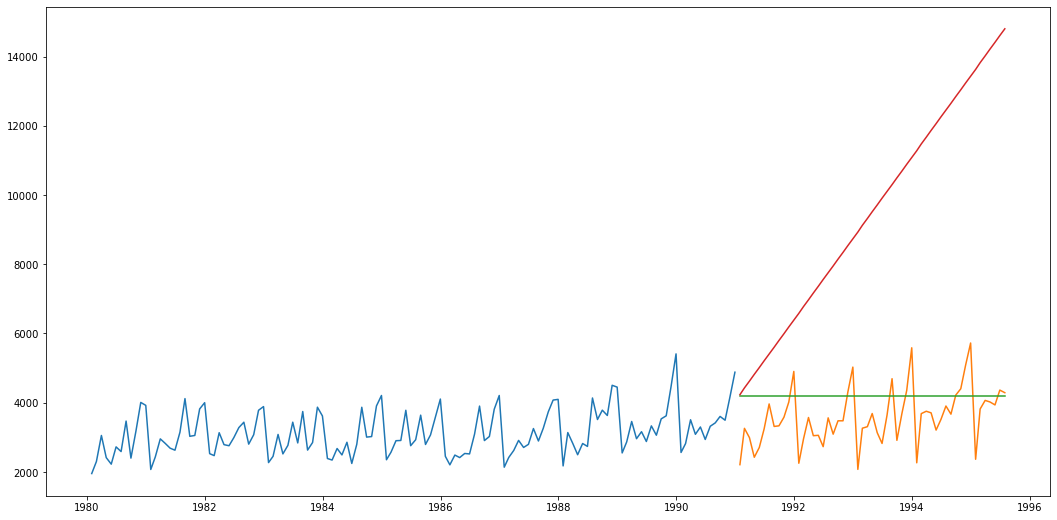

In [79]:
plt.figure(figsize=(18,9))
plt.plot(train['SoftDrinkProduction'], label='Train')
plt.plot(test['SoftDrinkProduction'], label='Test')

plt.plot(SES_test['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 1.0000000000000002, 0.7000000000000002, 0.3], label='Alpha=1.0,Beta=0.7,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

## Check for stationarity of the whole Time Series data.

In [88]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

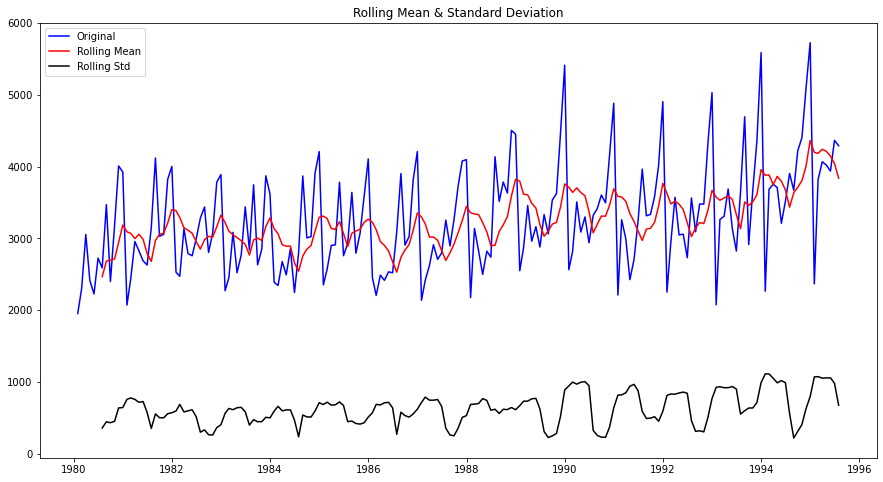

Results of Dickey-Fuller Test:
Test Statistic                   1.098734
p-value                          0.995206
#Lags Used                      12.000000
Number of Observations Used    174.000000
Critical Value (1%)             -3.468502
Critical Value (5%)             -2.878298
Critical Value (10%)            -2.575704
dtype: float64 



In [89]:
test_stationarity(df['SoftDrinkProduction'])

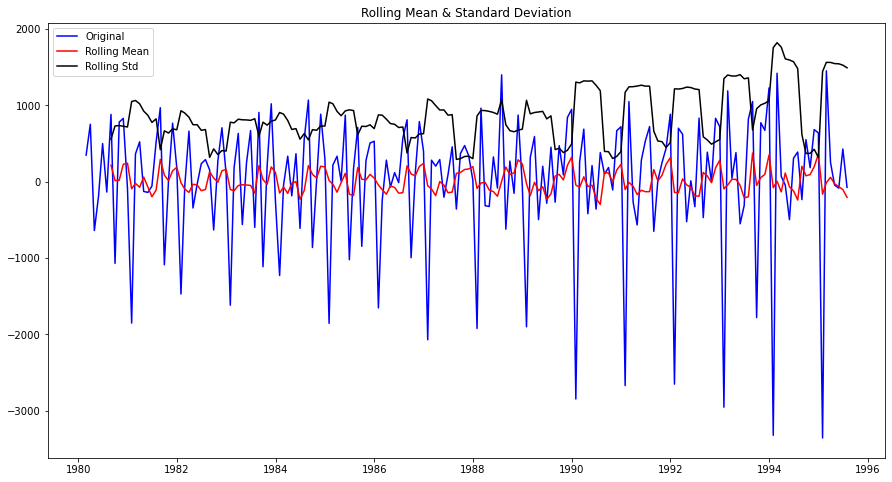

Results of Dickey-Fuller Test:
Test Statistic                -9.313527e+00
p-value                        1.033701e-15
#Lags Used                     1.100000e+01
Number of Observations Used    1.740000e+02
Critical Value (1%)           -3.468502e+00
Critical Value (5%)           -2.878298e+00
Critical Value (10%)          -2.575704e+00
dtype: float64 



In [91]:
test_stationarity(df['SoftDrinkProduction'].diff().dropna())

## Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [93]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [94]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [95]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['SoftDrinkProduction'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

C:\Users\shpar\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(0, 1, 0) - AIC:2105.61181288216
ARIMA(0, 1, 1) - AIC:2064.1122660558453
ARIMA(0, 1, 2) - AIC:2051.6441882614054
ARIMA(1, 1, 0) - AIC:2099.4432265948294


C:\Users\shpar\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(1, 1, 1) - AIC:2056.6807481321657


C:\Users\shpar\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(1, 1, 2) - AIC:2051.47466121904
ARIMA(2, 1, 0) - AIC:2073.430255640284


C:\Users\shpar\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(2, 1, 1) - AIC:2053.9383300316763
ARIMA(2, 1, 2) - AIC:2053.416949145226


C:\Users\shpar\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [96]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
5,"(1, 1, 2)",2051.474661
2,"(0, 1, 2)",2051.644188
8,"(2, 1, 2)",2053.416949
7,"(2, 1, 1)",2053.938330
4,"(1, 1, 1)",2056.680748
1,"(0, 1, 1)",2064.112266
6,"(2, 1, 0)",2073.430256
3,"(1, 1, 0)",2099.443227
0,"(0, 1, 0)",2105.611813


In [98]:
auto_ARIMA = ARIMA(train['SoftDrinkProduction'], order=(1,1,1),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\shpar\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\shpar\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

                               ARIMA Model Results                               
Dep. Variable:     D.SoftDrinkProduction   No. Observations:                  131
Model:                    ARIMA(1, 1, 1)   Log Likelihood               -1024.340
Method:                          css-mle   S.D. of innovations            592.248
Date:                   Tue, 17 May 2022   AIC                           2056.681
Time:                           21:39:45   BIC                           2068.182
Sample:                       02-29-1980   HQIC                          2061.354
                            - 12-31-1990                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           5.4324      1.847      2.942      0.003       1.813       9.052
ar.L1.D.SoftDrinkProduction     0.2719      0.087      3

In [99]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [101]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['SoftDrinkProduction'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

788.8742721468639


In [102]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(1,1,1)'])

resultsDf

,RMSE
"ARIMA(1,1,1)",788.874272


## Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE

C:\Users\shpar\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


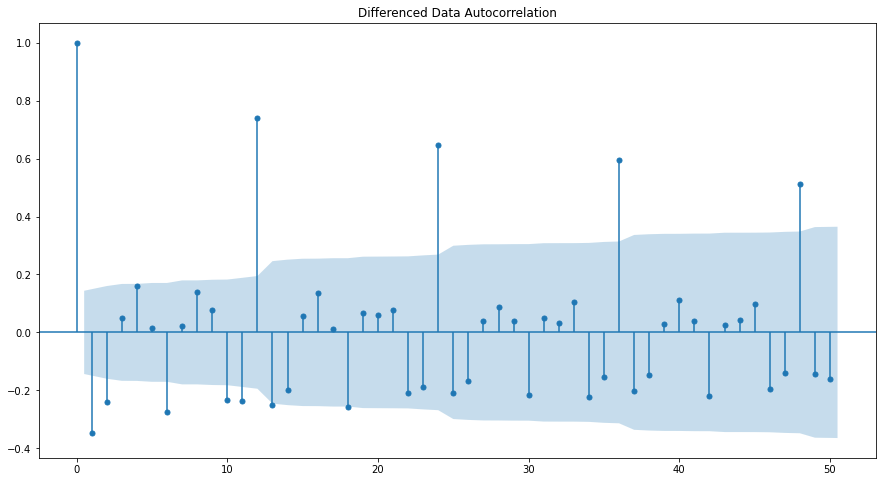

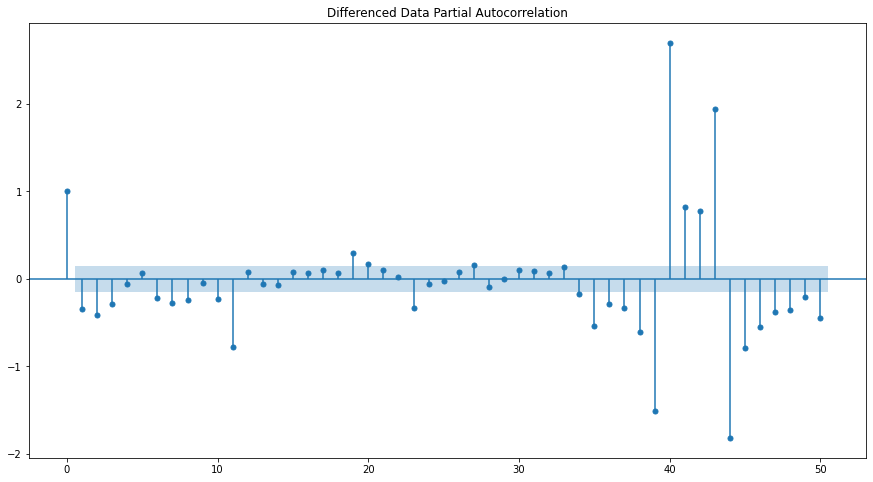

In [105]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['SoftDrinkProduction'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['SoftDrinkProduction'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [106]:
manual_ARIMA = ARIMA(train['SoftDrinkProduction'].astype('float64'), order=(0,1,0),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               ARIMA Model Results                               
Dep. Variable:     D.SoftDrinkProduction   No. Observations:                  131
Model:                    ARIMA(0, 1, 0)   Log Likelihood               -1050.806
Method:                              css   S.D. of innovations            736.921
Date:                   Tue, 17 May 2022   AIC                           2105.612
Time:                           21:41:01   BIC                           2111.362
Sample:                       02-29-1980   HQIC                          2107.948
                            - 12-31-1990                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.3511     64.385      0.347      0.728    -103.841     148.544


C:\Users\shpar\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [108]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [109]:
rmse = mean_squared_error(test['SoftDrinkProduction'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

2047.415574862207


In [110]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(0,1,0)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(1,1,1)",788.874272
"ARIMA(0,1,0)",2047.415575


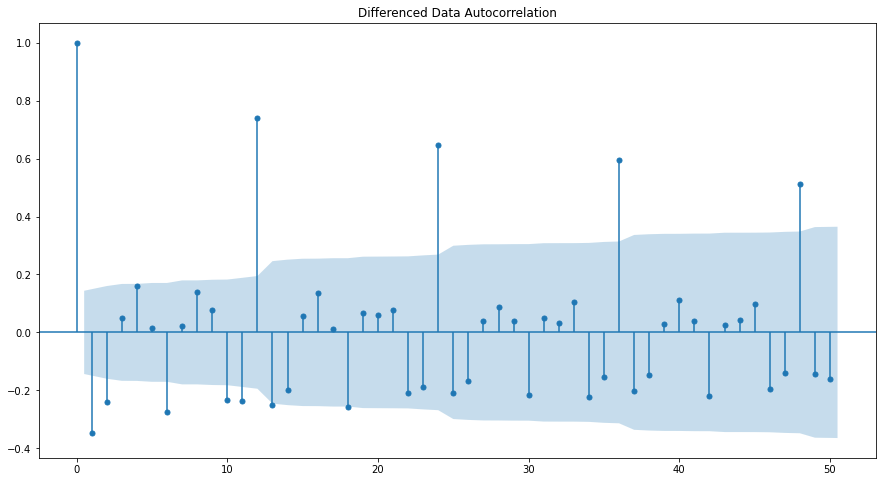

In [111]:
plot_acf(df['SoftDrinkProduction'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [112]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [113]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [114]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['SoftDrinkProduction'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2088.4633983660715
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1991.686591139842
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1835.7619130468086
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2001.2435317896568
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1938.0559370891308
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1819.7378453343445
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1790.6600051597607
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1790.4200189619683
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1765.5917652548267
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2035.4871783907365
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1932.6082414352368
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1785.228825913978
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:1952.5333036961092
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1856.52162788515
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1747.6522126205384
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1748.7242567779747
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1750.3434719505105
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1698.8469672180072
SARIMA(0, 1, 2)x(0, 0, 0, 6) - A

In [115]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 6)",1686.172022
53,"(1, 1, 2)","(2, 0, 2, 6)",1688.105594
80,"(2, 1, 2)","(2, 0, 2, 6)",1689.372222
17,"(0, 1, 1)","(2, 0, 2, 6)",1698.846967
44,"(1, 1, 1)","(2, 0, 2, 6)",1700.331864


In [116]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['SoftDrinkProduction'].values,
                                order=(2, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -835.686
Date:                           Tue, 17 May 2022   AIC                           1689.372
Time:                                   21:43:00   BIC                           1714.155
Sample:                                        0   HQIC                          1699.432
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1978      0.925      0.214      0.831      -1.615       2.011
ar.L2         -0.1100      0.140     -0.783

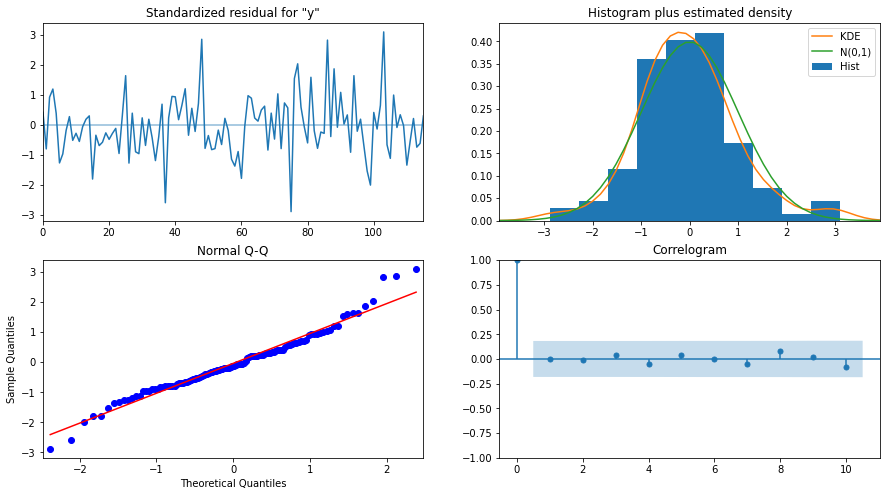

In [117]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

In [118]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [119]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,2718.801520,317.529757,2096.454632,3341.148408
1,3102.054172,325.288803,2464.499833,3739.608511
2,3312.960553,326.411668,2673.205440,3952.715666
3,3085.115848,329.598159,2439.115328,3731.116368
4,3267.643238,334.013958,2612.987910,3922.298565


In [120]:
rmse = mean_squared_error(test['SoftDrinkProduction'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

451.79050402892483


In [121]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(1,1,1)",788.874272
"ARIMA(0,1,0)",2047.415575
"SARIMA(0,1,2)(2,0,2,6)",451.790504


In [123]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [124]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [125]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['SoftDrinkProduction'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2088.4633983660715
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1836.2200937706555
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1633.5491793654214
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1789.866280699666
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1764.6107238898878
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1591.515574448123
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1608.648860364038
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1608.6165283979672
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1591.8014039553957
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2035.4871783907365
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1788.5369694843475
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1577.0183750239003
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1749.9824755850484
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1697.7997311030726
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1530.6914315600695
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1563.4637994171194
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1558.212075384814
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1529.2536659264333
SARIMA(0, 1, 2

In [126]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",1517.207903
23,"(0, 1, 2)","(1, 0, 2, 12)",1518.229381
53,"(1, 1, 2)","(2, 0, 2, 12)",1518.328977
50,"(1, 1, 2)","(1, 0, 2, 12)",1519.197012
80,"(2, 1, 2)","(2, 0, 2, 12)",1520.313658


In [127]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['SoftDrinkProduction'].values,
                                order=(0, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -753.115
Date:                            Tue, 17 May 2022   AIC                           1518.229
Time:                                    21:45:11   BIC                           1534.096
Sample:                                         0   HQIC                          1524.657
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7961      0.115     -6.933      0.000      -1.021      -0.571
ma.L2         -0.1066      0.100   

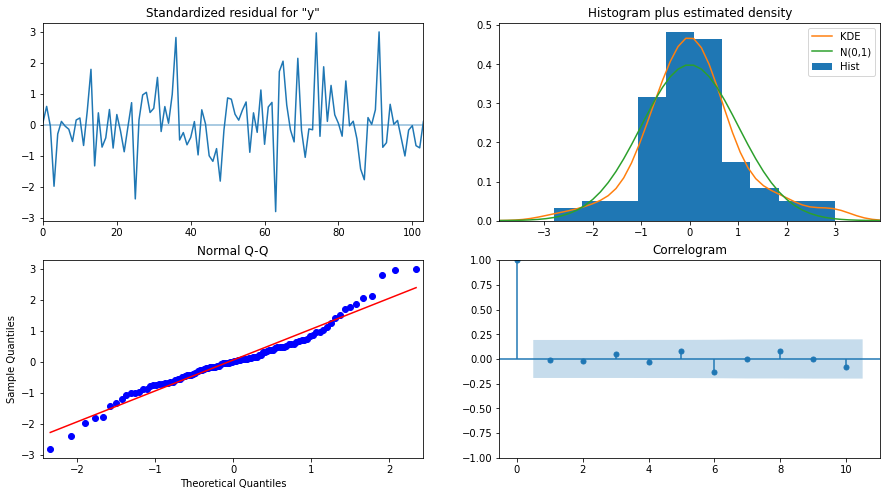

In [128]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

In [129]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [130]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,2657.291699,330.074487,2010.357592,3304.225806
1,2969.603234,336.865575,2309.358840,3629.847628
2,3407.980684,338.391443,2744.745644,4071.215725
3,3090.032602,339.912257,2423.816821,3756.248383
4,3287.721030,341.426398,2618.537588,3956.904473


In [131]:
rmse = mean_squared_error(test['SoftDrinkProduction'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

442.93530619472386


In [132]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(2,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(1,1,1)",788.874272
"ARIMA(0,1,0)",2047.415575
"SARIMA(0,1,2)(2,0,2,6)",451.790504
"SARIMA(1,1,2)(2,0,2,12)",442.935306


C:\Users\shpar\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


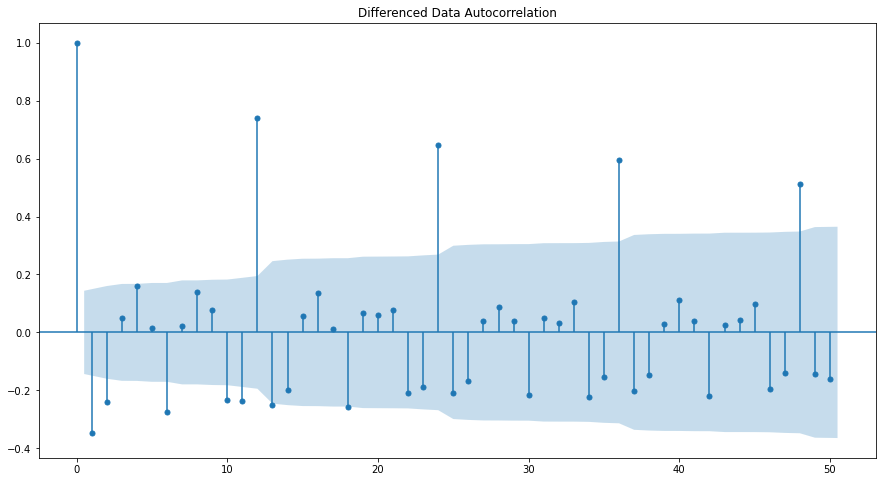

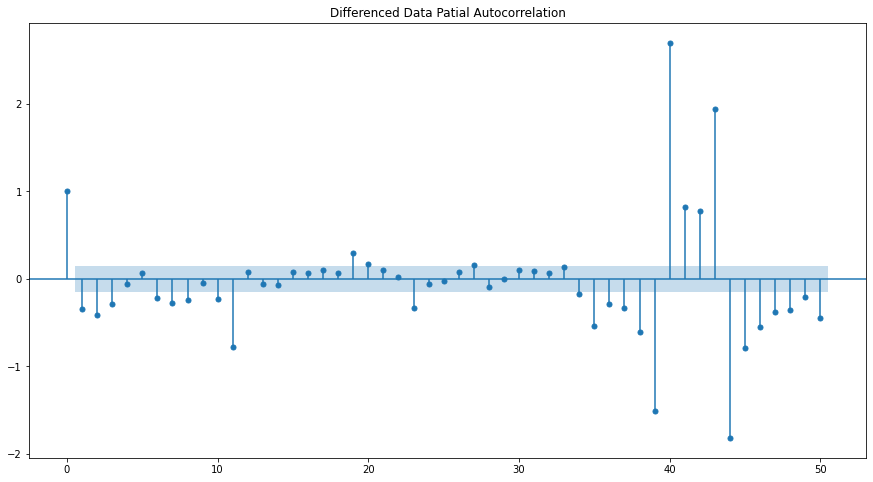

In [133]:
plot_acf(df['SoftDrinkProduction'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['SoftDrinkProduction'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

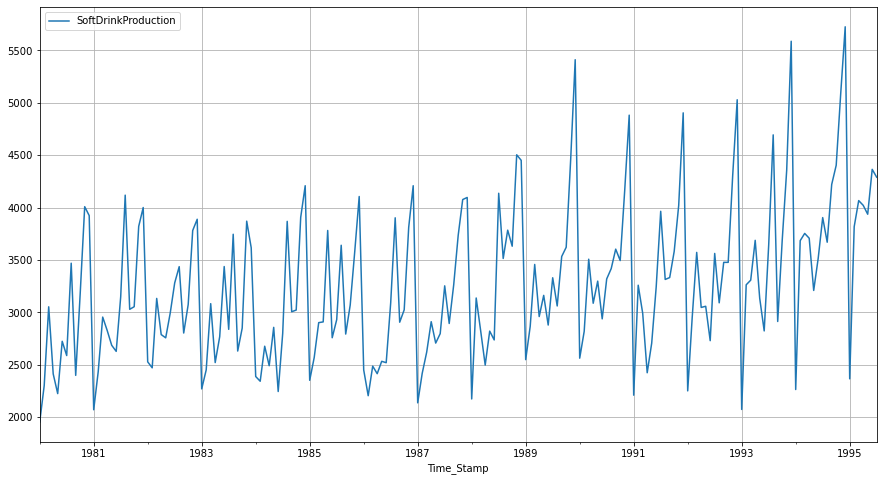

In [134]:
df.plot()
plt.grid();

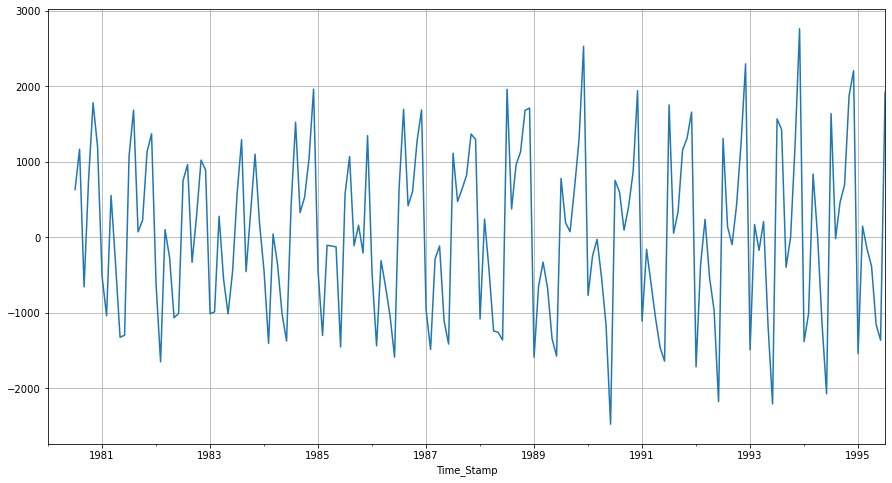

In [135]:
(df['SoftDrinkProduction'].diff(6)).plot()
plt.grid();

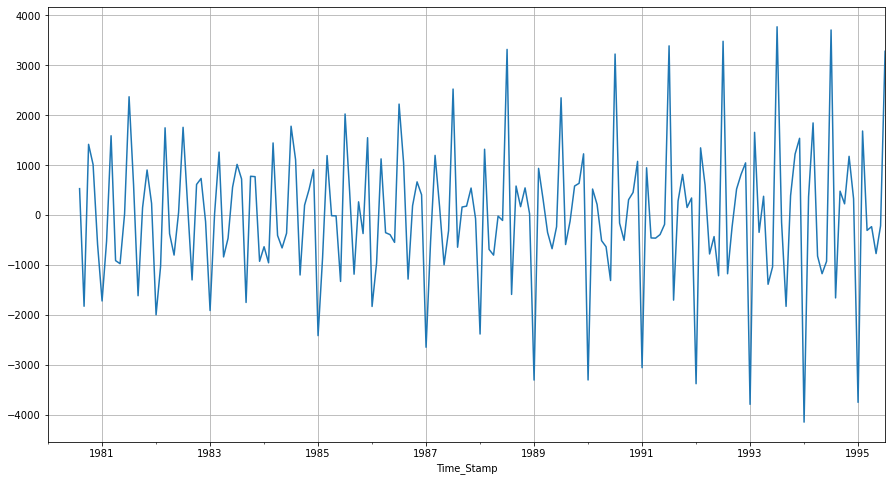

In [136]:
(df['SoftDrinkProduction'].diff(6)).diff().plot()
plt.grid();

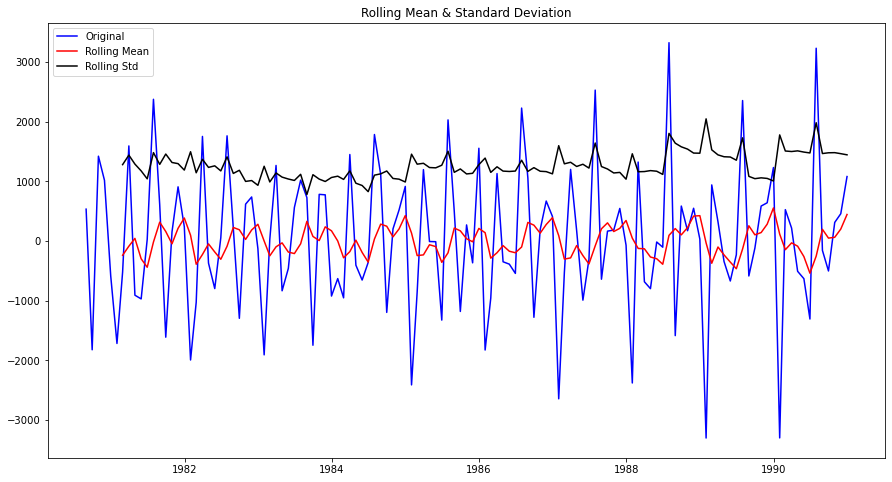

Results of Dickey-Fuller Test:
Test Statistic                -7.167226e+00
p-value                        2.865418e-10
#Lags Used                     1.200000e+01
Number of Observations Used    1.120000e+02
Critical Value (1%)           -3.490131e+00
Critical Value (5%)           -2.887712e+00
Critical Value (10%)          -2.580730e+00
dtype: float64 



In [137]:
test_stationarity((train['SoftDrinkProduction'].diff(6).dropna()).diff(1).dropna())

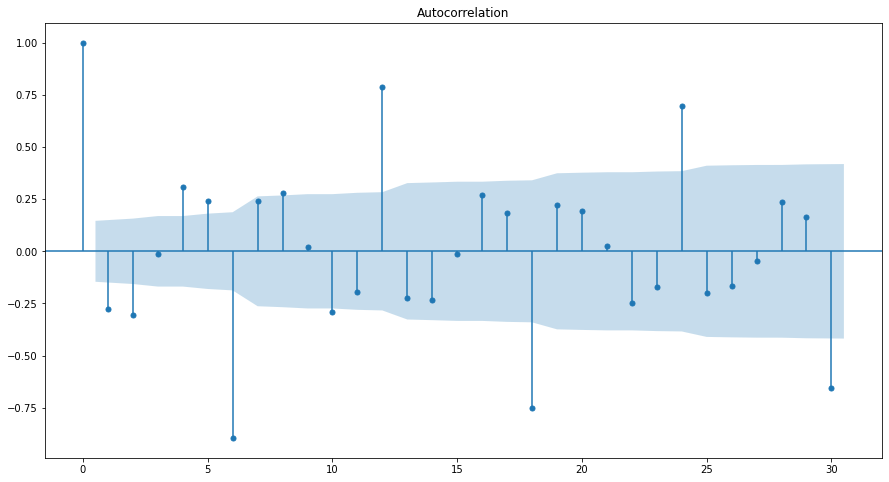

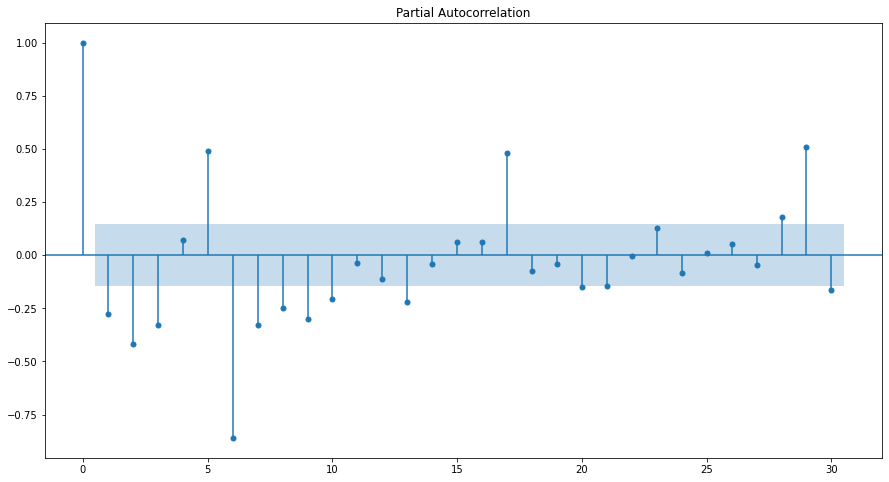

In [138]:
plot_acf((df['SoftDrinkProduction'].diff(6).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df['SoftDrinkProduction'].diff(6).dropna()).diff(1).dropna(),lags=30);

In [139]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['SoftDrinkProduction'].values,
                                order=(0, 1, 0),
                                seasonal_order=(1, 1, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                         SARIMAX Results                                         
Dep. Variable:                                         y   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(1, 1, [1, 2, 3], 6)   Log Likelihood                -790.890
Date:                                   Tue, 17 May 2022   AIC                           1591.780
Time:                                           21:47:45   BIC                           1605.098
Sample:                                                0   HQIC                          1597.178
                                                   - 132                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L6       -0.9773      0.026    -37.900      0.000    

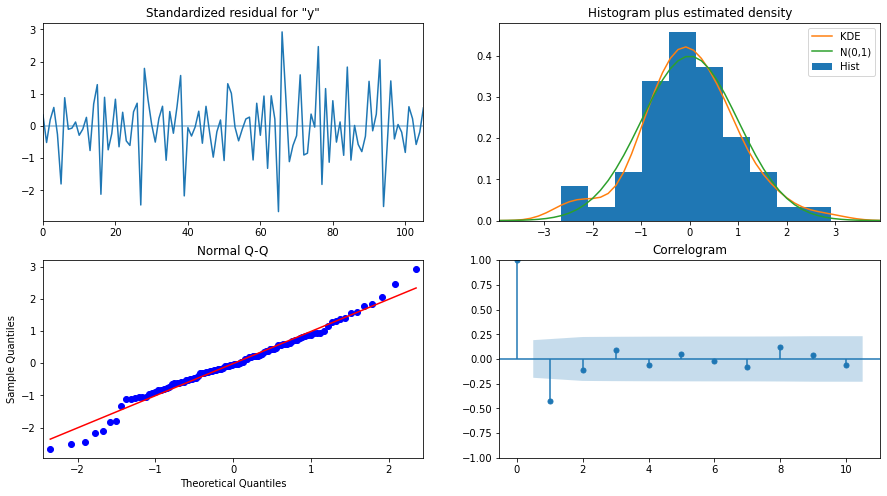

In [140]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

In [141]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [142]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,2699.450119,417.155629,1881.840110,3517.060127
1,3039.544177,589.945133,1883.272964,4195.815390
2,3407.917039,722.531453,1991.781414,4824.052664
3,3121.311182,834.306983,1486.099544,4756.522820
4,3348.419714,932.783245,1520.198148,5176.641279


In [143]:
rmse = mean_squared_error(test['SoftDrinkProduction'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

445.42648778228516


In [144]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,0)(1,1,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(1,1,1)",788.874272
"ARIMA(0,1,0)",2047.415575
"SARIMA(0,1,2)(2,0,2,6)",451.790504
"SARIMA(1,1,2)(2,0,2,12)",442.935306
"SARIMA(0,1,0)(1,1,3,6)",445.426488


In [145]:
full_data_model = sm.tsa.statespace.SARIMAX(df['SoftDrinkProduction'],
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\shpar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\shpar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:               SoftDrinkProduction   No. Observations:                  187
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood               -1242.744
Date:                           Tue, 17 May 2022   AIC                           2499.488
Time:                                   21:48:32   BIC                           2521.479
Sample:                               01-31-1980   HQIC                          2508.411
                                    - 07-31-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.2672      0.170     -7.443      0.000      -1.601      -0.933
ma.L2          0.0757      0.120      0.631

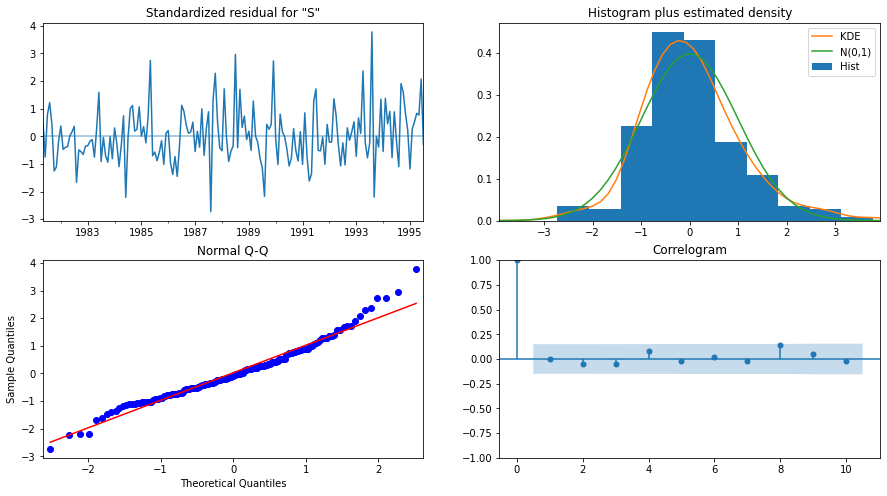

In [146]:
results_full_data_model.plot_diagnostics();

In [147]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [148]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

SoftDrinkProduction,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,4367.518083,339.446711,3702.214754,5032.821411
1995-09-30,4219.686090,341.376096,3550.601237,4888.770942
1995-10-31,4433.535754,345.616298,3756.140257,5110.931252
1995-11-30,5246.587875,349.805557,4560.981582,5932.194169
1995-12-31,5959.987104,353.945458,5266.266754,6653.707454


In [149]:
rmse = mean_squared_error(df['SoftDrinkProduction'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 443.558300255819


In [150]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

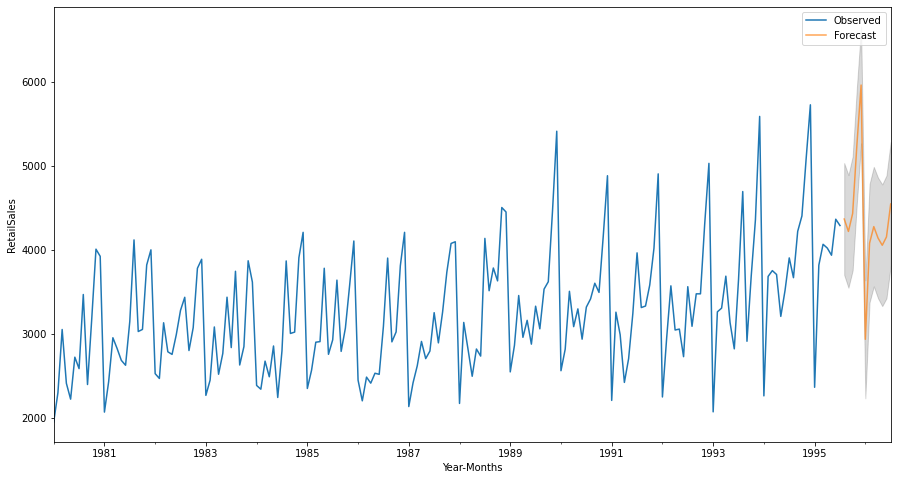

In [151]:
# plot the forecast along with the confidence band

axis = df['SoftDrinkProduction'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('RetailSales')
plt.legend(loc='best')
plt.show()

In [152]:
resultsDf

,RMSE
"ARIMA(1,1,1)",788.874272
"ARIMA(0,1,0)",2047.415575
"SARIMA(0,1,2)(2,0,2,6)",451.790504
"SARIMA(1,1,2)(2,0,2,12)",442.935306
"SARIMA(0,1,0)(1,1,3,6)",445.426488
